# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID") 

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
Number_mice = combined_data["Mouse ID"].value_counts().count()
Number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.duplicated()
duplicate_mice_ID = combined_data.loc[duplicate_mice,"Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_list = combined_data.loc[combined_data["Mouse ID"] == 'g989',:]
duplicate_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [39]:
# Checking the number of mice in the clean DataFrame.
Cleaned_data_df["Mouse ID"].value_counts().count()

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen = Cleaned_data_df.groupby("Drug Regimen")

mean = Drug_Regimen.mean()["Tumor Volume (mm3)"]
median = Drug_Regimen.median()["Tumor Volume (mm3)"]
variance = Drug_Regimen.var()["Tumor Volume (mm3)"]
stdv = Drug_Regimen.std()["Tumor Volume (mm3)"]
SEM = Drug_Regimen.sem()["Tumor Volume (mm3)"]

Summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance,
                          "Tumor Volume Std. Dev.": stdv, "Tumor Volume Std. Err.": SEM})
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
mice_counts = Cleaned_data_df["Drug Regimen"].value_counts()

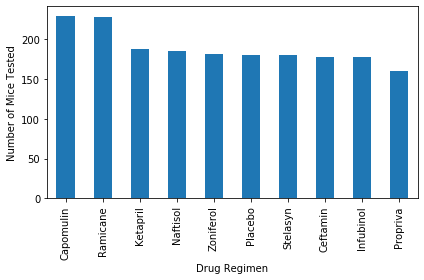

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_counts.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()

Text(0, 0.5, 'Number of Mice Tested')

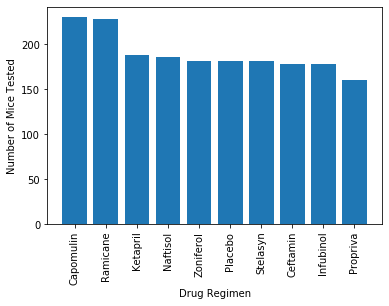

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mice_counts.index, mice_counts, align = "center")
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [12]:
sex_table = Cleaned_data_df["Sex"].value_counts()/Cleaned_data_df["Sex"].count() * 100
sex_table

Male      50.634249
Female    49.365751
Name: Sex, dtype: float64

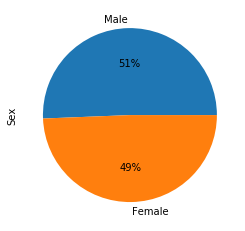

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_table.plot(kind = "pie", autopct='%1.0f%%', figsize =(4,4))

Text(0, 0.5, 'Sex')

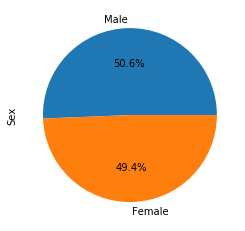

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_table, labels=sex_table.index, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [54]:
Cleaned_data_df.dropna(axis=1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_TR = Cleaned_data_df.loc[(Cleaned_data_df["Drug Regimen"] == "Capomulin") | (Cleaned_data_df["Drug Regimen"] == "Ramicane")|
                              (Cleaned_data_df["Drug Regimen"] == "Infubinol") | (Cleaned_data_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
groupy_drug = four_TR.groupby("Mouse ID")
Max_tumor_volume = groupy_drug["Timepoint"].max()
Max_tumor_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max_timepoint = pd.merge(Max_tumor_volume, four_TR, how = "left", on = ["Mouse ID", "Timepoint"]) 
merge_max_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments_list:
    tumor_vol_loop = merge_max_timepoint.loc[merge_max_timepoint["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol_loop)
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_loop.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    Outliers = tumor_vol_loop.loc[(tumor_vol_loop < lower_bound) | (tumor_vol_loop > upper_bound)]
    print(f"{i}'s outliers: {Outliers}")
    

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


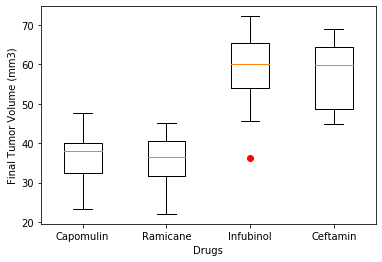

In [57]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels = treatments_list, sym = 'r')
plt.show()

## Line and Scatter Plots

In [20]:
Capomulin_df = Cleaned_data_df.loc[(Cleaned_data_df["Drug Regimen"] == "Capomulin")]
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_find = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509", :]

Text(0.5, 1.0, 'capomulin treatment of mouse l509')

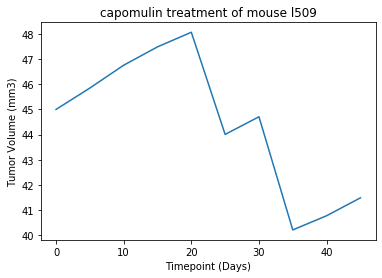

In [22]:
x_axis = Capomulin_find["Timepoint"]
y_axis = Capomulin_find["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("capomulin treatment of mouse l509")

In [23]:
Capomulin_df = Cleaned_data_df.loc[(Cleaned_data_df["Drug Regimen"] == "Capomulin")]

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Average_newtable = Capomulin_df.groupby(['Mouse ID']).mean()
Average_newtable.mean().head()

Timepoint             20.500000
Tumor Volume (mm3)    40.755487
Metastatic Sites       0.658000
Age_months            14.040000
Weight (g)            20.120000
dtype: float64

Text(0, 0.5, 'Average Tumor Volume (mm3)')

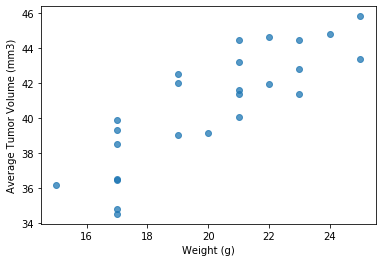

In [29]:
plt.scatter(Average_newtable["Weight (g)"], Average_newtable["Tumor Volume (mm3)"], alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [49]:
from scipy.stats import linregress

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


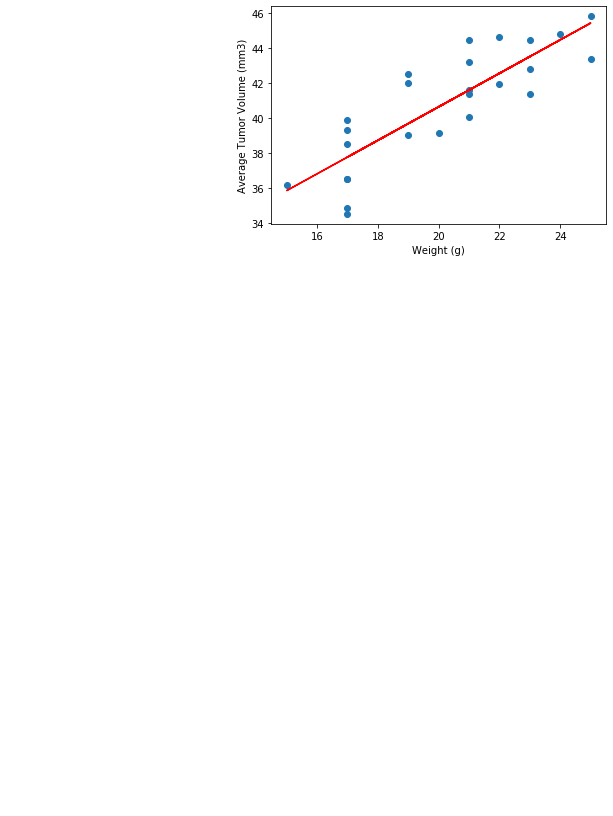

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Cleaned_data_df.loc[(Cleaned_data_df["Drug Regimen"] == "Capomulin")]
Average_newtable = Capomulin_df.groupby(['Mouse ID']).mean()

x_values = Average_newtable["Weight (g)"]
y_values = Average_newtable["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_value,y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()